In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Theme
sns.set_theme(style="whitegrid")
PINK = "#E91E63"

# Load data
df = pd.read_csv("fmcg_demand_data.csv", sep=';')
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)

# Feature engineering
df["Revenue"] = df["Sales_Volume"] * df["Price"]
df["Margin"] = (df["Price"] - df["Supplier_Cost"]) / df["Price"]
df["Is_Weekend"] = df["Weekday"].isin([5, 6])
df["Inventory_Coverage"] = df["Stock_Level"] / (df["Sales_Volume"].rolling(7).mean())

**ANALYSIS 1: DEMAND STRUCTURE & VARIABILITY**

>1.1 How does total demand evolve year over year?



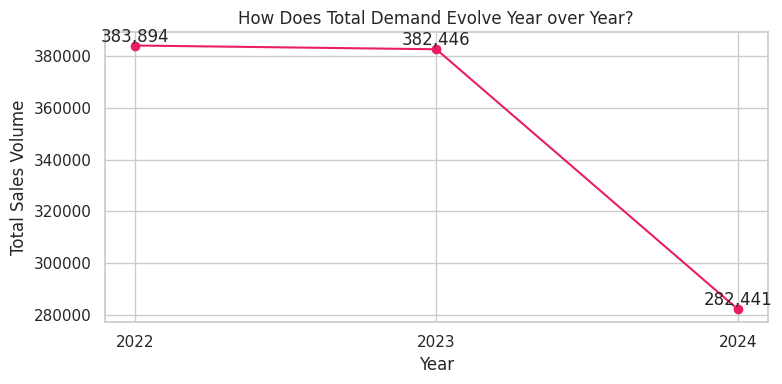

In [ ]:
yearly_demand = df.groupby(df["Date"].dt.year)["Sales_Volume"].sum()

plt.figure(figsize=(8,4))
ax = yearly_demand.plot(marker="o", color=PINK)
plt.title("How Does Total Demand Evolve Year over Year?")
plt.ylabel("Total Sales Volume")
plt.xlabel("Year")
plt.xticks(yearly_demand.index, rotation=0)

# Add numerical labels to the line plot
for year, sales in yearly_demand.items():
    ax.text(year, sales, f'{sales:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()



> 1.2 How does demand differ between weekdays and weekends?



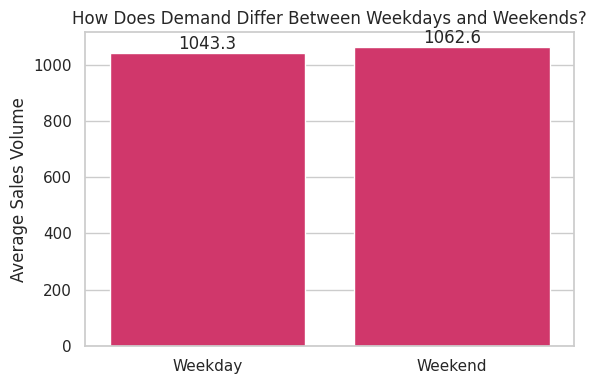

In [ ]:
weekday_demand = df.groupby("Is_Weekend")["Sales_Volume"].mean()

plt.figure(figsize=(6,4))
ax = sns.barplot(
    x=["Weekday", "Weekend"],
    y=weekday_demand.values,
    color=PINK
)
plt.title("How Does Demand Differ Between Weekdays and Weekends?")
plt.ylabel("Average Sales Volume")

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')

plt.tight_layout()
plt.show()



> 1.3 Which product categories show the highest demand volatility?



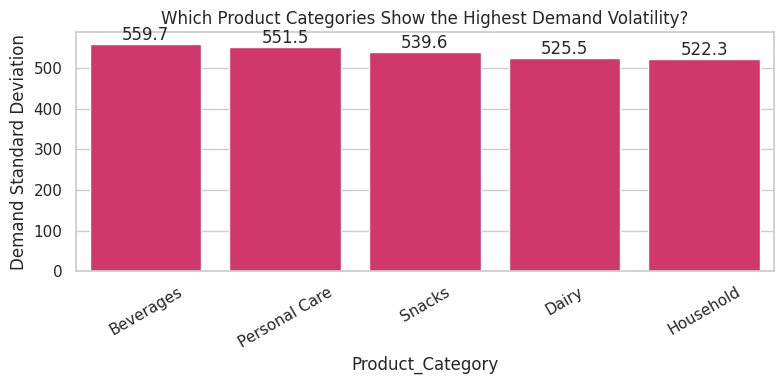

In [ ]:
volatility = df.groupby("Product_Category")["Sales_Volume"].std().sort_values(ascending=False)

plt.figure(figsize=(8,4))
ax=sns.barplot(
    x=volatility.index,
    y=volatility.values,
    color=PINK
)
plt.title("Which Product Categories Show the Highest Demand Volatility?")
plt.ylabel("Demand Standard Deviation")
plt.xticks(rotation=30)
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')

plt.show()



> 1.4 How does demand vary across store locations?



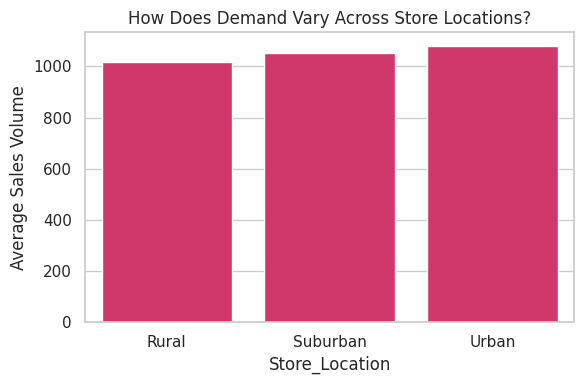

In [ ]:
location_demand = df.groupby("Store_Location")["Sales_Volume"].mean()

plt.figure(figsize=(6,4))
sns.barplot(
    x=location_demand.index,
    y=location_demand.values,
    color=PINK
)
plt.title("How Does Demand Vary Across Store Locations?")
plt.ylabel("Average Sales Volume")
plt.tight_layout()
plt.show()

**ANALYSIS 2: PROMOTION EFFECTIVENESS**
> 2.1 How do sales volumes differ between promo and non-promo periods?



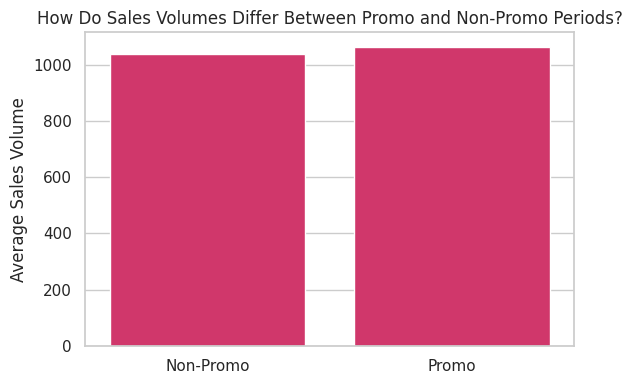

In [ ]:
promo_sales = df.groupby("Promotion")["Sales_Volume"].mean()

plt.figure(figsize=(6,4))
sns.barplot(
    x=["Non-Promo", "Promo"],
    y=promo_sales.values,
    color=PINK
)
plt.title("How Do Sales Volumes Differ Between Promo and Non-Promo Periods?")
plt.ylabel("Average Sales Volume")
plt.tight_layout()
plt.show()



> 2.2 Which product categories benefit most from promotions?



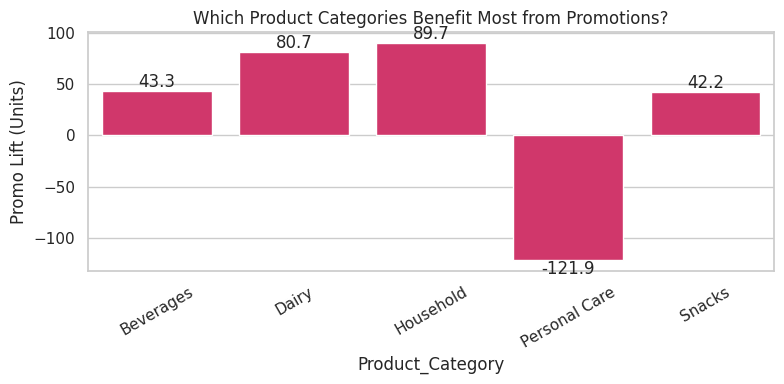

In [ ]:
promo_lift = df.groupby(["Product_Category", "Promotion"])["Sales_Volume"].mean().unstack()
promo_lift["Lift"] = promo_lift[1] - promo_lift[0]

plt.figure(figsize=(8,4))
ax=sns.barplot(
    x=promo_lift.index,
    y=promo_lift["Lift"],
    color=PINK
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
plt.title("Which Product Categories Benefit Most from Promotions?")
plt.ylabel("Promo Lift (Units)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()




> 2.3 How does promotion impact demand across store locations?



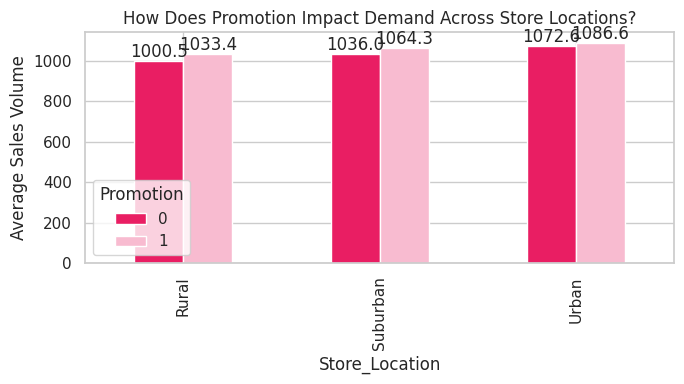

In [ ]:
location_promo = df.groupby(["Store_Location", "Promotion"])["Sales_Volume"].mean().unstack()

ax=location_promo.plot(
    kind="bar",
    figsize=(7,4),
    color=[PINK, "#F8BBD0"]
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
plt.title("How Does Promotion Impact Demand Across Store Locations?")
plt.ylabel("Average Sales Volume")
plt.tight_layout()
plt.show()



> 2.4 Does promotion amplify demand volatility?



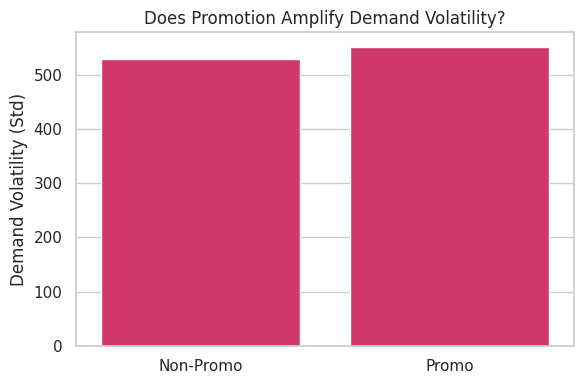

In [ ]:
promo_volatility = df.groupby("Promotion")["Sales_Volume"].std()

plt.figure(figsize=(6,4))
sns.barplot(
    x=["Non-Promo", "Promo"],
    y=promo_volatility.values,
    color=PINK
)
plt.title("Does Promotion Amplify Demand Volatility?")
plt.ylabel("Demand Volatility (Std)")
plt.tight_layout()
plt.show()

**ANALYSIS 3: PROFITABILITY & PRICING**

> 3.1 How do profit margins differ across product categories?



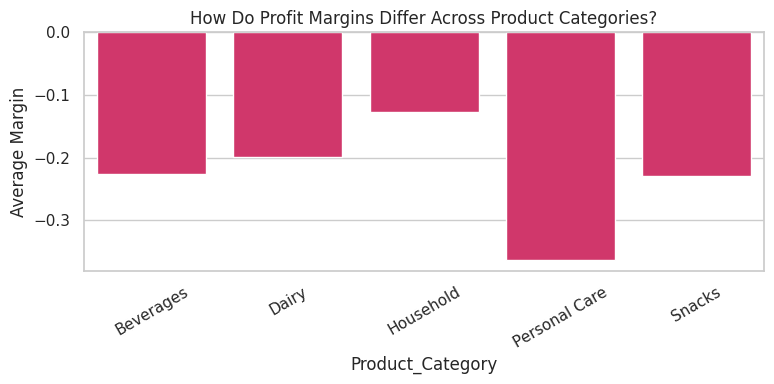

In [ ]:
margin_cat = df.groupby("Product_Category")["Margin"].mean()

plt.figure(figsize=(8,4))
ax=sns.barplot(
    x=margin_cat.index,
    y=margin_cat.values,
    color=PINK
)
plt.title("How Do Profit Margins Differ Across Product Categories?")
plt.ylabel("Average Margin")
plt.xticks(rotation=30)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f') # Format to one decimal plac

plt.show()



> 3.2 How does promotion affect profit margins?



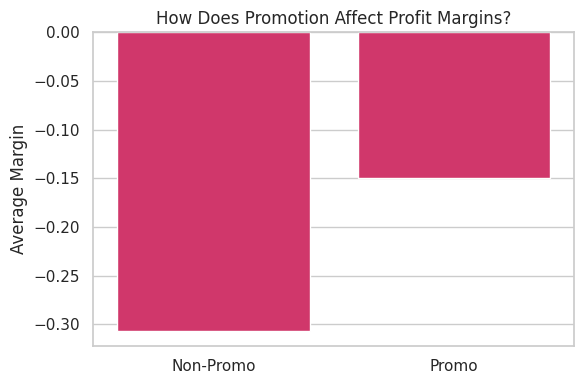

In [ ]:
promo_margin = df.groupby("Promotion")["Margin"].mean()

plt.figure(figsize=(6,4))
sns.barplot(
    x=["Non-Promo", "Promo"],
    y=promo_margin.values,
    color=PINK
)
plt.title("How Does Promotion Affect Profit Margins?")
plt.ylabel("Average Margin")
plt.tight_layout()
plt.show()



> 3.3 Is higher sales volume associated with lower margins?



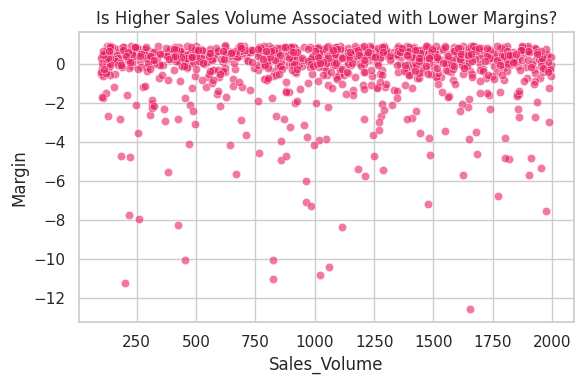

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=df,
    x="Sales_Volume",
    y="Margin",
    color=PINK,
    alpha=0.6
)
plt.title("Is Higher Sales Volume Associated with Lower Margins?")
plt.tight_layout()
plt.show()



> 3.4 Which categories deliver both high volume and healthy margins?



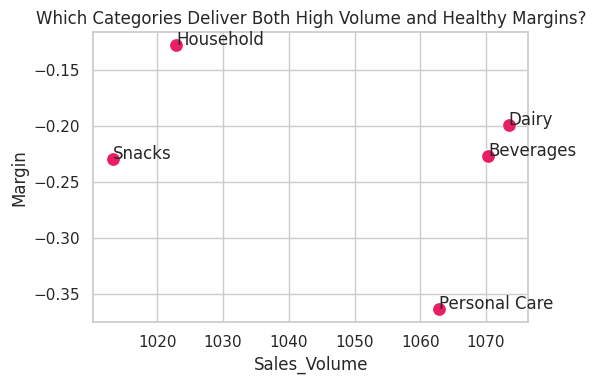

In [ ]:
cat_summary = df.groupby("Product_Category").agg({
    "Sales_Volume": "mean",
    "Margin": "mean"
})

plt.figure(figsize=(6,4))
sns.scatterplot(
    data=cat_summary,
    x="Sales_Volume",
    y="Margin",
    s=100,
    color=PINK
)
for i in cat_summary.index:
    plt.text(cat_summary.loc[i,"Sales_Volume"], cat_summary.loc[i,"Margin"], i)

plt.title("Which Categories Deliver Both High Volume and Healthy Margins?")
plt.tight_layout()
plt.show()

**ANALYSIS 4: SUPPLY CHAIN RESPONSIVENESS**

> 4.1 How do replenishment lead times differ by location?



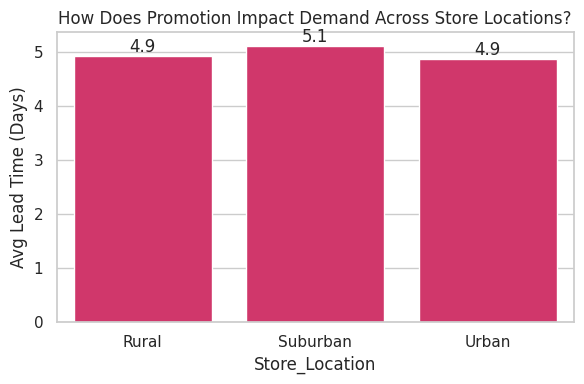

In [ ]:
lead_time_loc = df.groupby("Store_Location")["Replenishment_Lead_Time"].mean()

plt.figure(figsize=(6,4))
sns.barplot(
    x=lead_time_loc.index,
    y=lead_time_loc.values,
    color=PINK
)
plt.title("How Do Replenishment Lead Times Differ by Location?")
plt.ylabel("Avg Lead Time (Days)")
plt.tight_layout()
plt.show()



> 4.2 How does demand variability interact with lead time across locations?



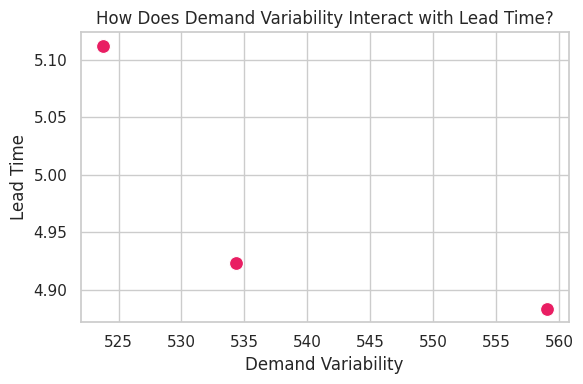

In [ ]:
loc_variability = df.groupby("Store_Location")["Sales_Volume"].std()

plt.figure(figsize=(6,4))
sns.scatterplot(
    x=loc_variability.values,
    y=lead_time_loc.values,
    color=PINK,
    s=100
)
plt.xlabel("Demand Variability")
plt.ylabel("Lead Time")
plt.title("How Does Demand Variability Interact with Lead Time?")
plt.tight_layout()
plt.show()



>4.3 Stock Adequacy Ratio (Service Risk Proxy)



In [ ]:
df["Stock_to_Demand_Ratio"] = df["Stock_Level"] / df["Sales_Volume"]

stock_risk_location = (
    df.groupby("Store_Location")["Stock_to_Demand_Ratio"]
    .agg(["mean", "std"])
    .reset_index()
)

stock_risk_location

,Store_Location,mean,std
0,Rural,0.473292,0.652946
1,Suburban,0.434088,0.529125
2,Urban,0.400270,0.497883


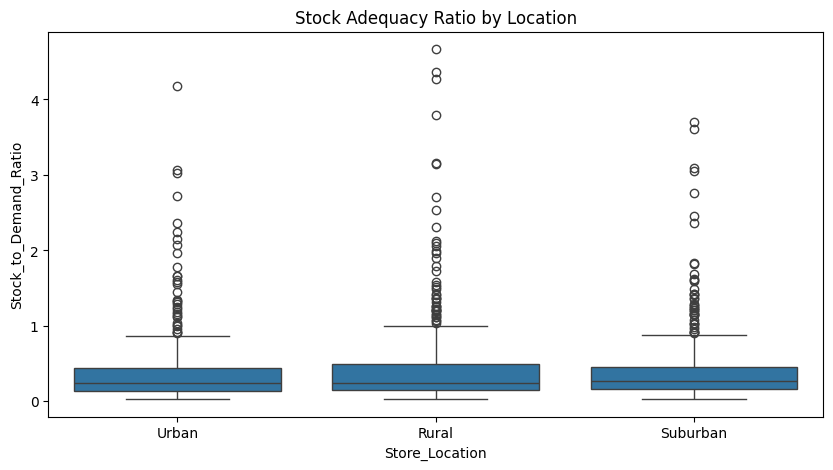

In [ ]:
sns.boxplot(
    data=df,
    x="Store_Location",
    y="Stock_to_Demand_Ratio"
)
plt.title("Stock Adequacy Ratio by Location")
plt.show()

**ANALYSIS 5: INVENTORY RISK & STOCKOUT ANALYSIS**

> 5.1 How many days of inventory are available on average?



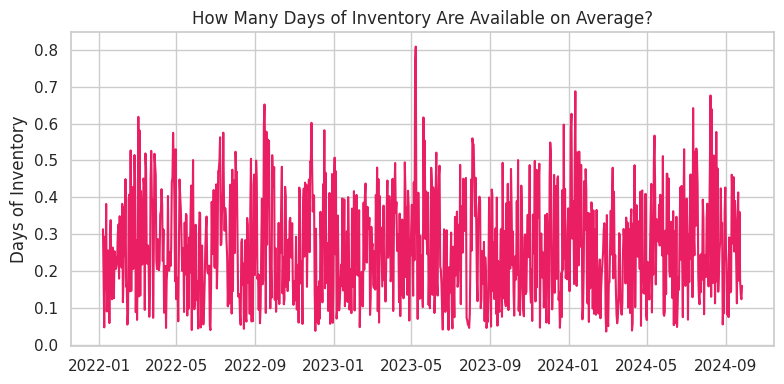

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(df["Date"], df["Inventory_Coverage"], color=PINK)
plt.title("How Many Days of Inventory Are Available on Average?")
plt.ylabel("Days of Inventory")
plt.tight_layout()
plt.show()



> 5.2 How does inventory coverage differ across product categories?



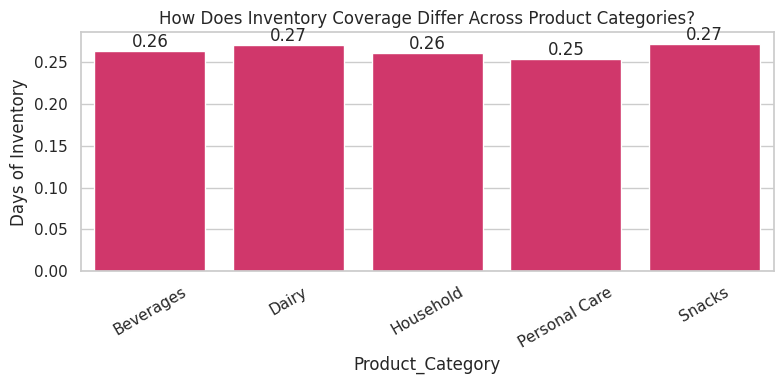

In [ ]:
inv_cat = df.groupby("Product_Category")["Inventory_Coverage"].mean()

plt.figure(figsize=(8,4))
ax=sns.barplot(
    x=inv_cat.index,
    y=inv_cat.values,
    color=PINK
)
plt.title("How Does Inventory Coverage Differ Across Product Categories?")
plt.ylabel("Days of Inventory")
plt.xticks(rotation=30)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f') # Format to one decimal plac
plt.show()



> 5.3 How does inventory coverage change during promotions?



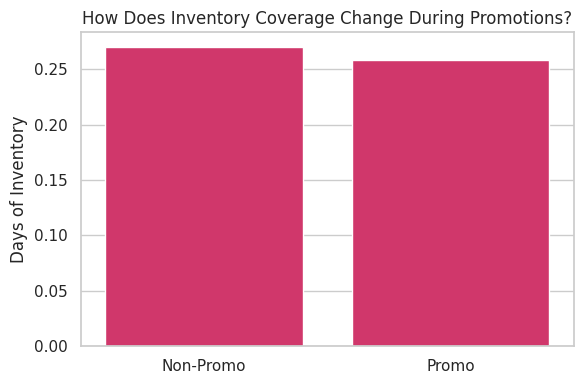

In [ ]:
inv_promo = df.groupby("Promotion")["Inventory_Coverage"].mean()

plt.figure(figsize=(6,4))
sns.barplot(
    x=["Non-Promo", "Promo"],
    y=inv_promo.values,
    color=PINK
)
plt.title("How Does Inventory Coverage Change During Promotions?")
plt.ylabel("Days of Inventory")
plt.tight_layout()
plt.show()



> 5.4 Which categories require tighter inventory control?



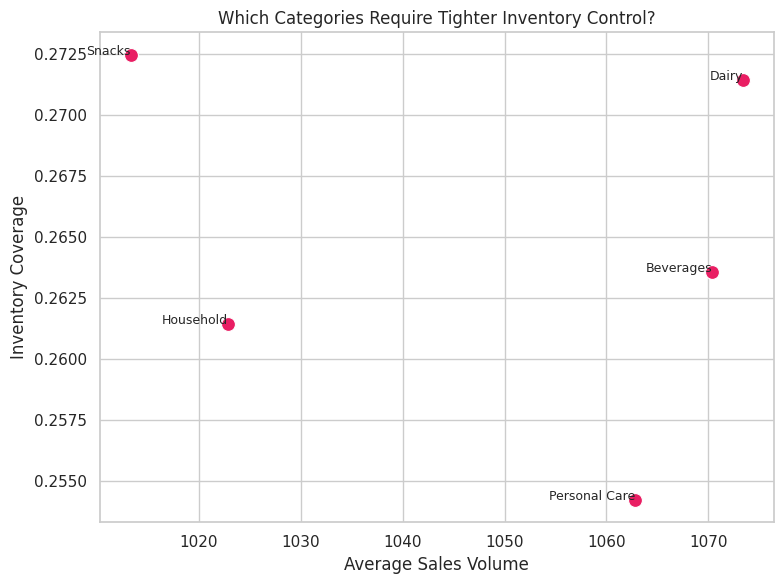

In [ ]:
plot_data = cat_summary.copy()
plot_data["Inventory_Coverage"] = inv_cat

plt.figure(figsize=(8,6)) # Increased figure size for better label visibility
sns.scatterplot(
    data=plot_data,
    x="Sales_Volume",
    y="Inventory_Coverage",
    color=PINK,
    s=100
)

for i, row in plot_data.iterrows():
    plt.text(row["Sales_Volume"], row["Inventory_Coverage"], i, fontsize=9, ha='right') # Add category names as labels

plt.title("Which Categories Require Tighter Inventory Control?")
plt.xlabel("Average Sales Volume")
plt.ylabel("Inventory Coverage")
plt.tight_layout()
plt.show()